In [8]:
import pdqhash
import cv2
import os.path as osp
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt


## pdqhash

In [9]:
def get_cos_similar(v1, v2):
    num = float(np.dot(v1, v2))  # 向量点乘
    denom = np.linalg.norm(v1) * np.linalg.norm(v2)  # 求模长的乘积
    return 0.5 + 0.5 * (num / denom) if denom != 0 else 0


def calcu_phash(h1, h2):
	return 1 - (h1 - h2) / len(h1.hash) ** 2


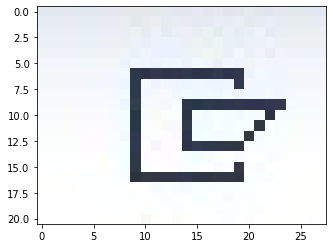

=========  0.80859375  ========


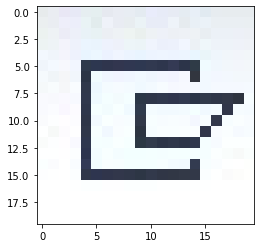

=========  0.7890625  ========


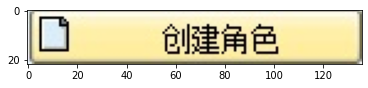

=========  0.77734375  ========


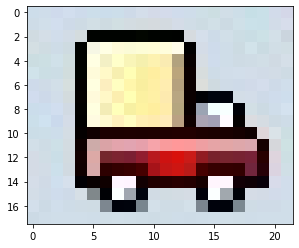

=========  0.77734375  ========


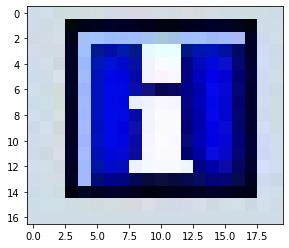

=========  0.77734375  ========


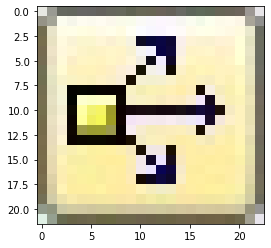

In [29]:



root = 'elements/'
org_img_paths = glob(os.path.join(root, '000-16', '*.jpg'))
org_imgp = org_img_paths[11]
image = cv2.imread(org_imgp)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
org_vector, org_quality = pdqhash.compute(image)
plt.imshow(image)
plt.show()

distances = []
paths = []
dst_img_paths = glob(osp.join(root, '000-15', '*.jpg'))
for imgp in dst_img_paths:
	img = cv2.imread(imgp)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	dst_vector, dst_qulity = pdqhash.compute(img)
	dis = get_cos_similar(org_vector, dst_vector)
	distances.append(dis)
	paths.append(imgp)

dst_rank = np.argsort(distances)[::-1]
for idx in dst_rank[:5]:
    p = paths[idx]
    im = cv2.imread(p)[:, :, ::-1]
    print('========= ', distances[idx], ' ========')
    plt.imshow(im)
    plt.show()


## cnn feature